# What is Correlation

We know that if 2 predictors are highly correlated with each other then this can cause issues with the OLS solution. In particular let us say that we have 11 predictors. Of the 11 predictors $X_1$ and $X_2$ are highly correlated with each other. Since they are highly correlated it means that we can write

$$\large X_1 = \beta_0 + \beta_1 X_2 + \varepsilon$$
where $\varepsilon$ is some noise. In other words we can use the predictor $X_2$ to estimate the value of $X_1$.

# What is Multicollinearity
However, high correlation is not the only situation that can affect the OLS solution. Multi-collinearity is another issue in which

    Multicollinearity is the occurrence of high intercorrelations among two or more independent variables in a multiple regression model. 
    - https://www.investopedia.com/terms/m/multicollinearity.asp
    
    
So instead, multi-collinearity is the situation where

$$\large X_1 = \beta_0 + \beta_1 X_2 + \beta_2 X_5 + \beta_3 X_7 + \cdots + \varepsilon$$
where $\varepsilon$ is some noise. In other words, we can use multiple predictors to estimate the value of $X_1$.

The difficulty of multicollinearity is that it does not show up when looking at the correlation matrix. So lets see this here!

In [23]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

In [24]:
n = 100
k = 10

np.random.seed(42)

x = np.random.rand(n, k)

# Compute the weighted sum of x and add some random noise
e = np.random.rand(n) * 1.1
w = np.array([(-1) ** i for i in range(k)])
x1 = (np.sum(x * w, axis=1) + e).reshape(n, -1)

In [25]:
w

array([ 1, -1,  1, -1,  1, -1,  1, -1,  1, -1])

In [26]:
x_train = pd.DataFrame(np.concatenate([x, x1], axis=1))
x_train.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.374540,0.950714,0.731994,0.598658,0.156019,0.155995,0.058084,0.866176,0.601115,0.708073,-1.154218
1,0.020584,0.969910,0.832443,0.212339,0.181825,0.183405,0.304242,0.524756,0.431945,0.291229,0.185491
2,0.611853,0.139494,0.292145,0.366362,0.456070,0.785176,0.199674,0.514234,0.592415,0.046450,1.260680
3,0.607545,0.170524,0.065052,0.948886,0.965632,0.808397,0.304614,0.097672,0.684233,0.440152,0.966891
4,0.122038,0.495177,0.034389,0.909320,0.258780,0.662522,0.311711,0.520068,0.546710,0.184854,-0.611097


In [27]:
x_train.corr()

,0,1,2,3,4,5,6,7,8,9,10
0,1.000000,-0.132448,-0.017471,0.045306,0.092790,-0.040598,0.072209,-0.016588,-0.095953,0.005863,0.381040
1,-0.132448,1.000000,0.212663,-0.085697,0.004565,-0.025379,-0.176209,0.055295,0.038501,0.115898,-0.400067
2,-0.017471,0.212663,1.000000,0.032616,-0.155827,-0.006887,-0.114155,0.125099,0.051094,0.056831,0.119880
3,0.045306,-0.085697,0.032616,1.000000,0.146274,0.101782,-0.119854,-0.071322,0.012184,-0.069192,-0.183094
4,0.092790,0.004565,-0.155827,0.146274,1.000000,0.041421,0.019232,-0.107280,-0.148244,-0.046883,0.248976
5,-0.040598,-0.025379,-0.006887,0.101782,0.041421,1.000000,0.000513,-0.107892,0.150582,0.088351,-0.244504
6,0.072209,-0.176209,-0.114155,-0.119854,0.019232,0.000513,1.000000,-0.033213,0.007482,-0.075692,0.432549
7,-0.016588,0.055295,0.125099,-0.071322,-0.107280,-0.107892,-0.033213,1.000000,-0.115291,0.019958,-0.324327
8,-0.095953,0.038501,0.051094,0.012184,-0.148244,0.150582,0.007482,-0.115291,1.000000,0.235775,0.182466
9,0.005863,0.115898,0.056831,-0.069192,-0.046883,0.088351,-0.075692,0.019958,0.235775,1.000000,-0.303187


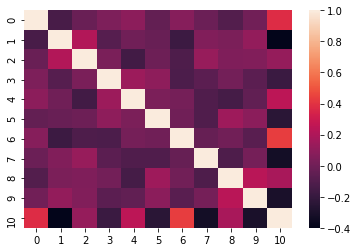

In [28]:
sns.heatmap(x_train.corr())

As you can see above there is no serious correlations between any of the predictors. We might be concered with the correlation between 10 & 1, 10 & 6. But otherwise it looks fine.

So to find multicollinearity we can use multiple methods, but the most simple of it is the VIF - variance inflation factor. Again, multicollinearity is the situation in which

$$\large X_1 = \beta_0 + \beta_1 X_2 + \beta_2 X_5 + \beta_3 X_7 + \cdots + \varepsilon$$
i.e. a simple linear regression model. So the method of VIF is simple, just build a linear regression model to predict $X_1$ and see what happens. Specifically, if we were to look at the VIF of $X_1$ we 


1. Perform the regression
$$\large X_1 = \beta_0 + \beta_1 X_2 + \beta_2 X_3 + \beta_3 X_4 + \cdots + \beta_{9} X_{10}+ \beta_{10} X_{11}$$

2. Compute the r-squared ($R_1$). Now lets think about this intuitively, if there did exist multicollinearity in $X_1$ then we expect the regression to perform well (i.e. high r-squared). But if there didn't exist multicollinearity then the regression will perform bad (i.e low r-squared).

3. Compute the VIF. So if you have a high r-squared than the VIF will be high, and if you have a low r-squared then the VIF will be low.
$$\large VIF_1 = \frac{1}{1-R_1}$$


### Note
Note that this only computes the VIF for 1 predictor. So you will need to do the same procedure for all the other predictors

In [38]:
target_index = 1

# Dataframe of the target predictor
target_predictor = x_train.loc[:, target_index]

# Dataframe of everything else (removing the target predictor)
other_predictors = x_train.drop(columns=target_index)

In [39]:
target_predictor.head()

0    0.950714
1    0.969910
2    0.139494
3    0.170524
4    0.495177
Name: 1, dtype: float64

In [40]:
other_predictors.head()

,0,2,3,4,5,6,7,8,9,10
0,0.374540,0.731994,0.598658,0.156019,0.155995,0.058084,0.866176,0.601115,0.708073,-1.154218
1,0.020584,0.832443,0.212339,0.181825,0.183405,0.304242,0.524756,0.431945,0.291229,0.185491
2,0.611853,0.292145,0.366362,0.456070,0.785176,0.199674,0.514234,0.592415,0.046450,1.260680
3,0.607545,0.065052,0.948886,0.965632,0.808397,0.304614,0.097672,0.684233,0.440152,0.966891
4,0.122038,0.034389,0.909320,0.258780,0.662522,0.311711,0.520068,0.546710,0.184854,-0.611097


Again, the key is that we are going to use `other_predictor` to predict the `target_predictor`

In [41]:
model = LinearRegression()
model.fit(other_predictors, target_predictor)

r2_score = model.score(other_predictors, target_predictor)

vif = 1 / (1 - r2_score)
print(f"R2 for Predictor {target_index}: {round(r2_score, 5)}")
print(f"VIF for Predictor {target_index}: {round(vif, 5)}")

R2 for Predictor 1: 0.57755
VIF for Predictor 1: 2.36717


In [42]:
n_cols = len(x_train.columns)

In [43]:
for target_index in range(n_cols):
    target_predictor = x_train.loc[:, target_index]
    other_predictors = x_train.drop(columns=target_index)
    
    model = LinearRegression()
    model.fit(other_predictors, target_predictor)
    
    r2_score = model.score(other_predictors, target_predictor)
    vif = 1 / (1 - r2_score)
    
    print("-"*40)
    print(f"R2 for Predictor {target_index}: {round(r2_score, 5)}")
    print(f"VIF for Predictor {target_index}: {round(vif, 5)}")

----------------------------------------
R2 for Predictor 0: 0.49257
VIF for Predictor 0: 1.97073
----------------------------------------
R2 for Predictor 1: 0.57755
VIF for Predictor 1: 2.36717
----------------------------------------
R2 for Predictor 2: 0.53096
VIF for Predictor 2: 2.13202
----------------------------------------
R2 for Predictor 3: 0.42663
VIF for Predictor 3: 1.74407
----------------------------------------
R2 for Predictor 4: 0.51389
VIF for Predictor 4: 2.05714
----------------------------------------
R2 for Predictor 5: 0.43896
VIF for Predictor 5: 1.78241
----------------------------------------
R2 for Predictor 6: 0.48816
VIF for Predictor 6: 1.95373
----------------------------------------
R2 for Predictor 7: 0.47124
VIF for Predictor 7: 1.89122
----------------------------------------
R2 for Predictor 8: 0.54607
VIF for Predictor 8: 2.20298
----------------------------------------
R2 for Predictor 9: 0.49707
VIF for Predictor 9: 1.98834
--------------------

Interesting! We can see that the r-squared for predictor 10 is quite high - 89%. But the correlation matrix does not say so.

In [13]:
x_train.corr()

,0,1,2,3,4,5,6,7,8,9,10
0,1.000000,-0.132448,-0.017471,0.045306,0.092790,-0.040598,0.072209,-0.016588,-0.095953,0.005863,0.381040
1,-0.132448,1.000000,0.212663,-0.085697,0.004565,-0.025379,-0.176209,0.055295,0.038501,0.115898,-0.400067
2,-0.017471,0.212663,1.000000,0.032616,-0.155827,-0.006887,-0.114155,0.125099,0.051094,0.056831,0.119880
3,0.045306,-0.085697,0.032616,1.000000,0.146274,0.101782,-0.119854,-0.071322,0.012184,-0.069192,-0.183094
4,0.092790,0.004565,-0.155827,0.146274,1.000000,0.041421,0.019232,-0.107280,-0.148244,-0.046883,0.248976
5,-0.040598,-0.025379,-0.006887,0.101782,0.041421,1.000000,0.000513,-0.107892,0.150582,0.088351,-0.244504
6,0.072209,-0.176209,-0.114155,-0.119854,0.019232,0.000513,1.000000,-0.033213,0.007482,-0.075692,0.432549
7,-0.016588,0.055295,0.125099,-0.071322,-0.107280,-0.107892,-0.033213,1.000000,-0.115291,0.019958,-0.324327
8,-0.095953,0.038501,0.051094,0.012184,-0.148244,0.150582,0.007482,-0.115291,1.000000,0.235775,0.182466
9,0.005863,0.115898,0.056831,-0.069192,-0.046883,0.088351,-0.075692,0.019958,0.235775,1.000000,-0.303187


Turns out that the data I have here actually is

$$X_{10} = X_0 - X_1 + X_2 - X_3 + X_4 - X_5 + X_6 - X_7 + X_8 - X_9 + \varepsilon$$
wher $\varepsilon$ is some noise. We can see how close our regression got to this value

In [44]:
target_index = 10

target_predictor = x_train.loc[:, target_index]
other_predictors = x_train.drop(columns=target_index)

model = LinearRegression()
model.fit(other_predictors, target_predictor)

LinearRegression()

In [45]:
model.coef_

array([ 1.04471965, -1.24659152,  1.13780443, -1.01446678,  1.07244312,
       -0.94176956,  1.07009378, -1.04350179,  1.08759064, -1.06551222])

In [15]:
predictor_coefficients = model.coef_
predictor_labels = [f"X_{i}" for i in range(10)]

predictor_coefficients

array([ 1.04471965, -1.24659152,  1.13780443, -1.01446678,  1.07244312,
       -0.94176956,  1.07009378, -1.04350179,  1.08759064, -1.06551222])

In [16]:
formated_coeff_label = [f"{round(coeff, 2)}{label}" 
                        for coeff, label in zip(predictor_coefficients, predictor_labels)]

print(" + ".join(formated_coeff_label))

1.04X_0 + -1.25X_1 + 1.14X_2 + -1.01X_3 + 1.07X_4 + -0.94X_5 + 1.07X_6 + -1.04X_7 + 1.09X_8 + -1.07X_9


$$\large 1.04X_0 -1.25X_1 + 1.14X_2 -1.01X_3 + 1.07X_4 -0.94X_5 + 1.07X_6 -1.04X_7 + 1.09X_8 -1.07X_9$$

Pretty close!

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [22]:
X = add_constant(x_train)
pd.Series([variance_inflation_factor(X.values, i) for i in range(1, X.shape[1])])

0     1.970732
1     2.367170
2     2.132022
3     1.744068
4     2.057140
5     1.782413
6     1.953732
7     1.891223
8     2.202976
9     1.988335
10    9.274260
dtype: float64

In [46]:
for target_index in range(n_cols):
    target_predictor = x_train.loc[:, target_index]
    other_predictors = x_train.drop(columns=target_index)
    
    model = LinearRegression()
    model.fit(other_predictors, target_predictor)
    
    r2_score = model.score(other_predictors, target_predictor)
    vif = 1 / (1 - r2_score)
    
    print("-"*40)
    print(f"R2 for Predictor {target_index}: {round(r2_score, 5)}")
    print(f"VIF for Predictor {target_index}: {round(vif, 5)}")

----------------------------------------
R2 for Predictor 0: 0.49257
VIF for Predictor 0: 1.97073
----------------------------------------
R2 for Predictor 1: 0.57755
VIF for Predictor 1: 2.36717
----------------------------------------
R2 for Predictor 2: 0.53096
VIF for Predictor 2: 2.13202
----------------------------------------
R2 for Predictor 3: 0.42663
VIF for Predictor 3: 1.74407
----------------------------------------
R2 for Predictor 4: 0.51389
VIF for Predictor 4: 2.05714
----------------------------------------
R2 for Predictor 5: 0.43896
VIF for Predictor 5: 1.78241
----------------------------------------
R2 for Predictor 6: 0.48816
VIF for Predictor 6: 1.95373
----------------------------------------
R2 for Predictor 7: 0.47124
VIF for Predictor 7: 1.89122
----------------------------------------
R2 for Predictor 8: 0.54607
VIF for Predictor 8: 2.20298
----------------------------------------
R2 for Predictor 9: 0.49707
VIF for Predictor 9: 1.98834
--------------------